In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
@njit
def calculate_energy(lattice, J, h, N):
    energy = 0.0
    for i in range(N):
        for j in range(N):
            spin = lattice[i, j]
            neighbors = (
                lattice[(i+1)%N, j] +
                lattice[(i-1)%N, j] +
                lattice[i, (j+1)%N] +
                lattice[i, (j-1)%N]
            )
            energy += -J * spin * neighbors
            energy += -h * spin
    return energy / 2.0  # avoid double counting

@njit
def metropolis_sweep(lat, J, h, T, N):
    for _ in range(N*N):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)

        spin = lat[i, j]
        neighbors = (
            lat[(i+1)%N, j] +
            lat[(i-1)%N, j] +
            lat[i, (j+1)%N] +
            lat[i, (j-1)%N]
        )

        delta_E = 2 * spin * (J * neighbors + h)

        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / T):
            lat[i, j] *= -1

@njit
def run_simulation(lat, sweeps, J, h, T, N):
    magnet = np.zeros(sweeps)
    energies = np.zeros(sweeps)

    for sweep in range(sweeps):
        metropolis_sweep(lat, J, h, T, N)
        energies[sweep] = calculate_energy(lat, J, h, N)
        magnet[sweep] = np.mean(lat)

    return energies, magnet

T=0.10  E=-19586.65  M=-0.03
T=0.16  E=-20000.00  M=1.00
T=0.22  E=-20000.00  M=-1.00
T=0.28  E=-19989.14  M=-1.00
T=0.34  E=-20000.00  M=-1.00
T=0.40  E=-19974.21  M=0.99
T=0.46  E=-19199.79  M=-0.12
T=0.51  E=-19987.56  M=-1.00
T=0.57  E=-19551.22  M=0.02
T=0.63  E=-19958.83  M=-0.98
T=0.69  E=-19997.00  M=-1.00
T=0.75  E=-19978.84  M=-0.99
T=0.81  E=-19995.86  M=1.00
T=0.87  E=-19520.07  M=-0.10
T=0.93  E=-19490.99  M=-0.17
T=0.99  E=-19973.38  M=1.00
T=1.05  E=-19430.02  M=-0.14
T=1.11  E=-19935.78  M=-1.00
T=1.17  E=-19358.13  M=-0.03
T=1.22  E=-19689.78  M=-0.89
T=1.28  E=-19351.33  M=0.59
T=1.34  E=-19452.03  M=-0.81
T=1.40  E=-19499.37  M=0.88
T=1.46  E=-19544.50  M=0.98
T=1.52  E=-18833.28  M=0.03
T=1.58  E=-19341.19  M=-0.98
T=1.64  E=-18531.78  M=-0.16
T=1.70  E=-18836.23  M=-0.91
T=1.76  E=-18771.95  M=-0.96
T=1.82  E=-17974.44  M=0.64
T=1.88  E=-17923.29  M=-0.81
T=1.93  E=-17169.01  M=-0.16
T=1.99  E=-17447.93  M=0.89
T=2.05  E=-16562.02  M=-0.62
T=2.11  E=-16449.52  M=0.

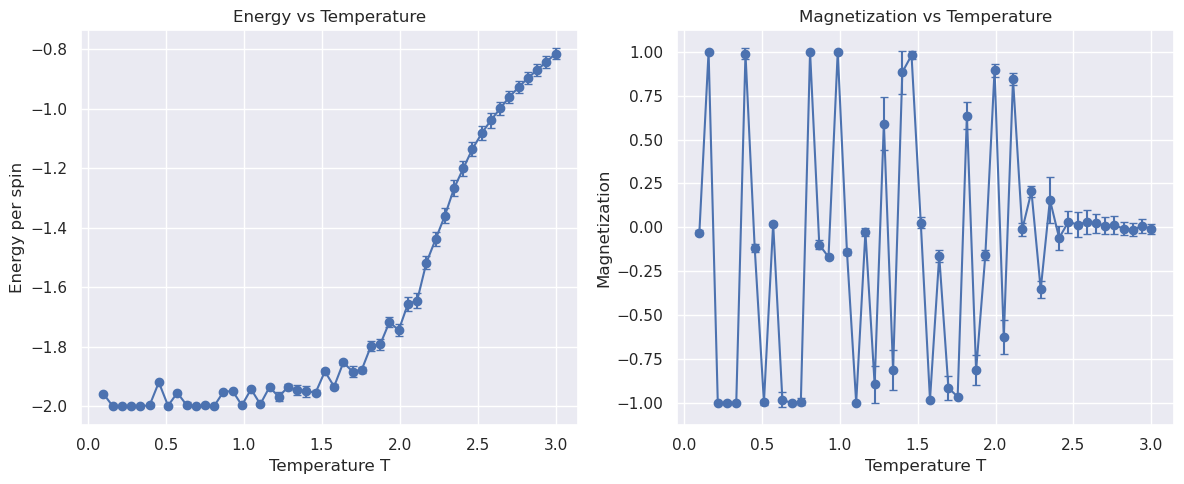

In [6]:
N = 100     # lattice size
h = 0        # external field
J = 1        # Interaction strength (ferromagnetic)
T = 2.5      # Temperature
energy = 0.0 # Energy
sweeps = 1000

def initialize_lattice(N):
    return np.random.choice([-1, 1], size=(N, N))

def simulate_ising(N, T, h, sweeps=1000):
    J = 1.0
    lat = initialize_lattice(N)

    # Thermalization
    for _ in range(sweeps):
        metropolis_sweep(lat, J, h, T, N)

    # Measurement
    energies, magnet = run_simulation(lat, sweeps, J, h, T, N)

    return np.mean(energies), np.std(energies), \
           np.mean(magnet), np.std(magnet), lat

def temperature_sweep(N, h, T_values, sweeps=1000):
    avg_E, std_E, avg_M, std_M = [], [], [], []

    for T in T_values:
        E_mean, E_std, M_mean, M_std, _ = simulate_ising(N, T, h, sweeps)
        avg_E.append(E_mean / (N * N))
        std_E.append(E_std / (N * N))
        avg_M.append(M_mean)
        std_M.append(M_std)
        print(f"T={T:.2f}  E={E_mean:.2f}  M={M_mean:.2f}")

    return np.array(avg_E), np.array(std_E), np.array(avg_M), np.array(std_M)

# Run the sweep
Ts = np.linspace(0.1, 3.0, 50)
E, E_err, M, M_err = temperature_sweep(N=N, h=0, T_values=Ts, sweeps=1000)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.errorbar(Ts, E, yerr=E_err, fmt='o-', capsize=3)
plt.xlabel("Temperature T")
plt.ylabel("Energy per spin")
plt.title("Energy vs Temperature")

plt.subplot(1, 2, 2)
plt.errorbar(Ts, M, yerr=M_err, fmt='o-', capsize=3)
plt.xlabel("Temperature T")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature")

plt.tight_layout()
plt.show()

T=0.10  E=-20000.00  M=-1.00
T=0.16  E=-19200.00  M=-0.22
T=0.22  E=-19588.73  M=-0.04
T=0.28  E=-19590.52  M=-0.19
T=0.34  E=-19986.88  M=1.00
T=0.40  E=-20000.00  M=-1.00
T=0.46  E=-19572.06  M=0.16
T=0.51  E=-19580.56  M=0.04
T=0.57  E=-19999.88  M=1.00
T=0.63  E=-19999.71  M=1.00
T=0.69  E=-19529.57  M=0.24
T=0.75  E=-19537.24  M=-0.16
T=0.81  E=-19996.01  M=-1.00
T=0.87  E=-19645.14  M=-0.70
T=0.93  E=-19501.65  M=0.36
T=0.99  E=-19466.76  M=0.24
T=1.05  E=-19439.27  M=-0.41
T=1.11  E=-19920.26  M=0.99
T=1.17  E=-19899.07  M=-1.00
T=1.22  E=-19840.03  M=0.99
T=1.28  E=-19604.47  M=0.86
T=1.34  E=-18873.42  M=0.30
T=1.40  E=-19078.79  M=-0.40
T=1.46  E=-19258.37  M=0.77
T=1.52  E=-19205.77  M=-0.85
T=1.58  E=-19341.64  M=0.98
T=1.64  E=-18478.08  M=0.00
T=1.70  E=-18389.61  M=0.49
T=1.76  E=-18019.28  M=-0.05
T=1.82  E=-18003.19  M=0.61
T=1.88  E=-18034.90  M=0.87
T=1.93  E=-17718.50  M=0.86
T=1.99  E=-17491.04  M=0.91
T=2.05  E=-16245.71  M=0.23
T=2.11  E=-16096.29  M=0.69
T=2.17 

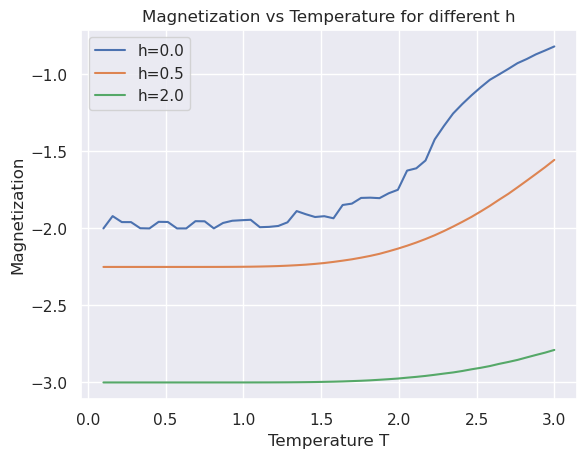

In [7]:
for h_val in [0.0, 0.5, 2.0]:
    M, _, _, _ = temperature_sweep(N=N, h=h_val, T_values=Ts, sweeps=1000)
    plt.plot(Ts, M, label=f"h={h_val}")

plt.xlabel("Temperature T")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for different h")
plt.legend()
plt.show()